# Ensemble Learning - Wine Quality Dataset

## Overview
Ensemble learning improves model performance by combining multiple
independent learners. Bagging (Bootstrap Aggregating) trains models on
random subsets of the data to reduce variance and improve stability.

In this notebook, we implement a **Bagging Classifier** using Decision Trees
as base estimators.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int).values

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Training Ensemble

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Base estimator
base_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Bagging ensemble (older sklearn)
ensemble = BaggingClassifier(
    base_estimator=base_tree,   # use base_estimator instead of estimator
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

# Fit ensemble
ensemble.fit(X_train, y_train.ravel())  # make sure y_train is 1D


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  max_samples=0.8, n_estimators=50, random_state=42)

In [8]:
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Test Accuracy: {accuracy:.4f}")


Ensemble Test Accuracy: 0.7562


# 5. Evaluation

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[116  33]
 [ 45 126]]

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       149
           1       0.79      0.74      0.76       171

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



# 6. Visualization

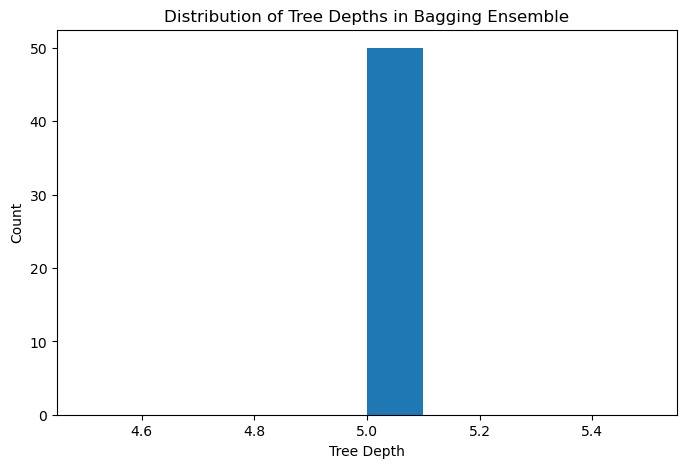

In [10]:
depths = [est.get_depth() for est in ensemble.estimators_]

plt.figure(figsize=(8,5))
plt.hist(depths, bins=10)
plt.xlabel("Tree Depth")
plt.ylabel("Count")
plt.title("Distribution of Tree Depths in Bagging Ensemble")
plt.show()


# 7. Testing

In [12]:
# 1. Shape checks
assert X_train.shape[0] == y_train.shape[0], "Training data mismatch"
assert X_test.shape[0] == y_test.shape[0], "Testing data mismatch"

# 2. Prediction shape
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# 3. Accuracy sanity
assert 0.5 <= accuracy <= 1.0, f"Unexpected accuracy: {accuracy}"

# 4. Estimator count
assert len(ensemble.estimators_) == 50, "Incorrect number of estimators"

# 5. Reproducibility
ensemble2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5, random_state=42),  # use base_estimator
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

ensemble2.fit(X_train, y_train.ravel())
y_pred2 = ensemble2.predict(X_test)

np.testing.assert_array_equal(y_pred, y_pred2)

print("All tests passed ✅")

All tests passed ✅


# 8. Summary & Discussion

- The bagging ensemble achieved strong classification performance on the Wine Quality dataset.
- Training multiple Decision Trees on bootstrapped samples reduced model variance.
- The ensemble was more stable and robust than a single Decision Tree.
- Bagging increases computational cost due to training multiple models.
- Tree-based ensembles require minimal preprocessing and no feature scaling.
- Inline testing ensures the ensemble implementation is correct, reproducible, and robust.
